In [57]:
import pandas as pd
import numpy as np
import datetime

import missingno as msno
from plotnine import *
import matplotlib.pyplot as plt
import warnings
import math
import sqlite3
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.impute import KNNImputer

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# For evaluating our model's performance
import sklearn.metrics as metrics

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

In [2]:
Dat_215_241 = pd.read_csv('Bio_Attendance_Questions_for_modelling.csv')

In [4]:
Dat_215_241.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'session_no', 'Member_name',
       'Days_attended', 'question_count', 'Gender', 'Whether_Minister',
       'Term_Details', 'Number_of_Terms', 'State_Name', 'Party_Name',
       'Date_of_Birth', 'Marital_Status', 'Educational_Qualification(s)',
       'Education_coded', 'Other_Profession', 'Previous_Membership',
       'Positions_Held', 'Book_Published', 'Activities', 'Hobbies',
       'Country_Visited', 'Essential_Information', 'Unnamed: 0_y',
       'session_name', 'session_end_date', 'session_start_date',
       'Term_start_year', 'seniority', 'Age', 'no_positions_held',
       'no_books_published', 'attendance_rate', 'participation_rate'],
      dtype='object')

In [13]:
Dat_215_241 = Dat_215_241[['attendance_rate','participation_rate','Gender', 'Whether_Minister','Marital_Status','Education_coded', 'seniority', 'Age', 'no_positions_held',
       'no_books_published']]
Dat_215_241.head()

,attendance_rate,participation_rate,Gender,Whether_Minister,Marital_Status,Education_coded,seniority,Age,no_positions_held,no_books_published
0,0.3,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,0.3,0.0,1,0,1,4.0,0.0,52.0,3.0,NaN
2,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,0.9,0.8,0,0,0,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
Dat_215_241.dtypes

attendance_rate       float64
Party_Name             object
participation_rate    float64
Gender                  int64
Whether_Minister        int64
Marital_Status          int64
Education_coded       float64
seniority             float64
Age                   float64
no_positions_held     float64
no_books_published    float64
dtype: object

In [15]:
Dat_215_241.shape

(7778, 10)

In [19]:
Dat_participation_attendance = Dat_215_241[['attendance_rate', 'participation_rate']]
Dat_participation_attendance.to_csv('Data_participation_attendance.csv')

In [20]:
Dat_participation_attendance.head()

,attendance_rate,participation_rate
0,0.3,0.0
1,0.3,0.0
2,NaN,0.0
3,0.9,0.8
4,NaN,0.0


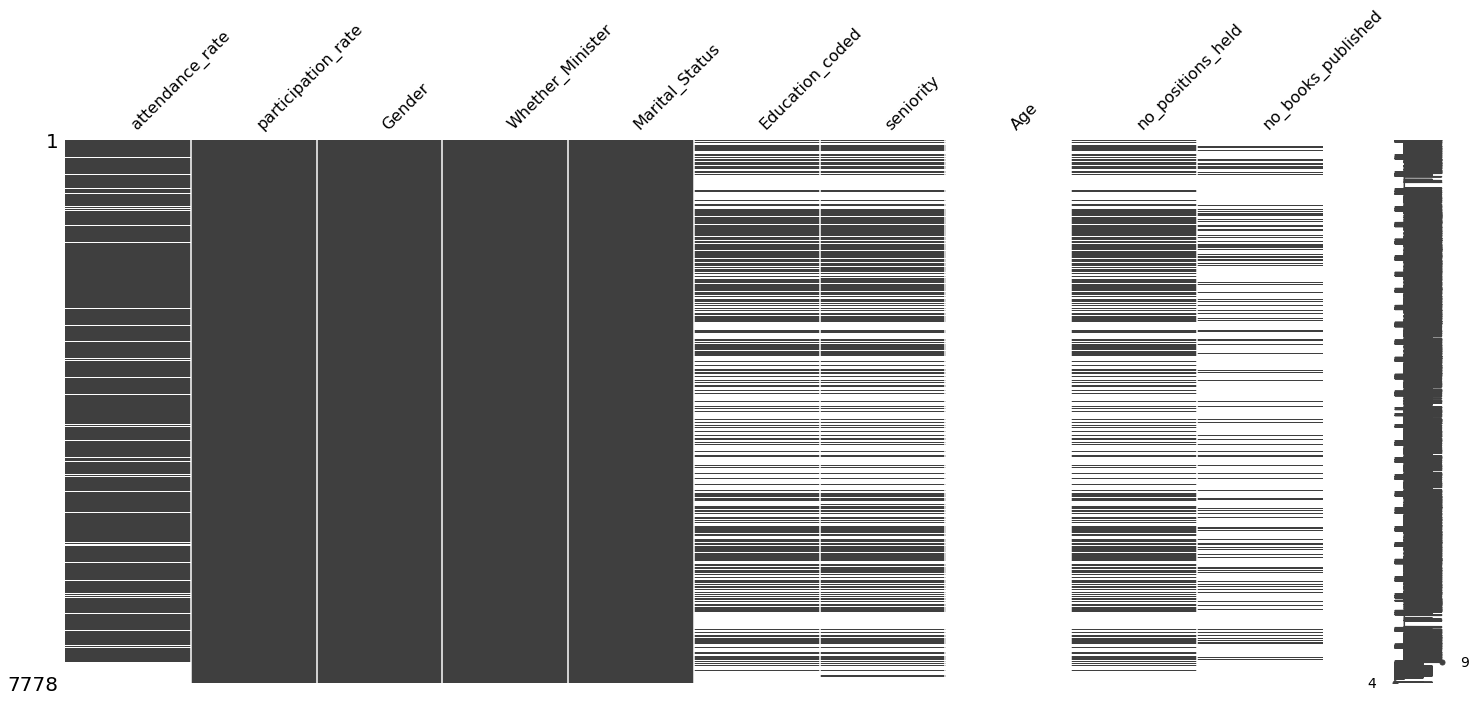

In [22]:
msno.matrix(Dat_215_241)

In [26]:
# Delete ministers and all from attendance rate - basically remove NAs
Dat_215_241_edit1 = Dat_215_241.dropna(subset=['Education_coded'])
Dat_215_241_edit1['no_books_published'] = Dat_215_241_edit1['no_books_published'].fillna(0)

In [ ]:
Dat_215_241_edit1 = Dat_215_241_edit1[['attendance_rate','participation_rate','Gender','Whether_Minister','Marital_Status','Education_coded', 'seniority', 'no_positions_held',
       'no_books_published']]

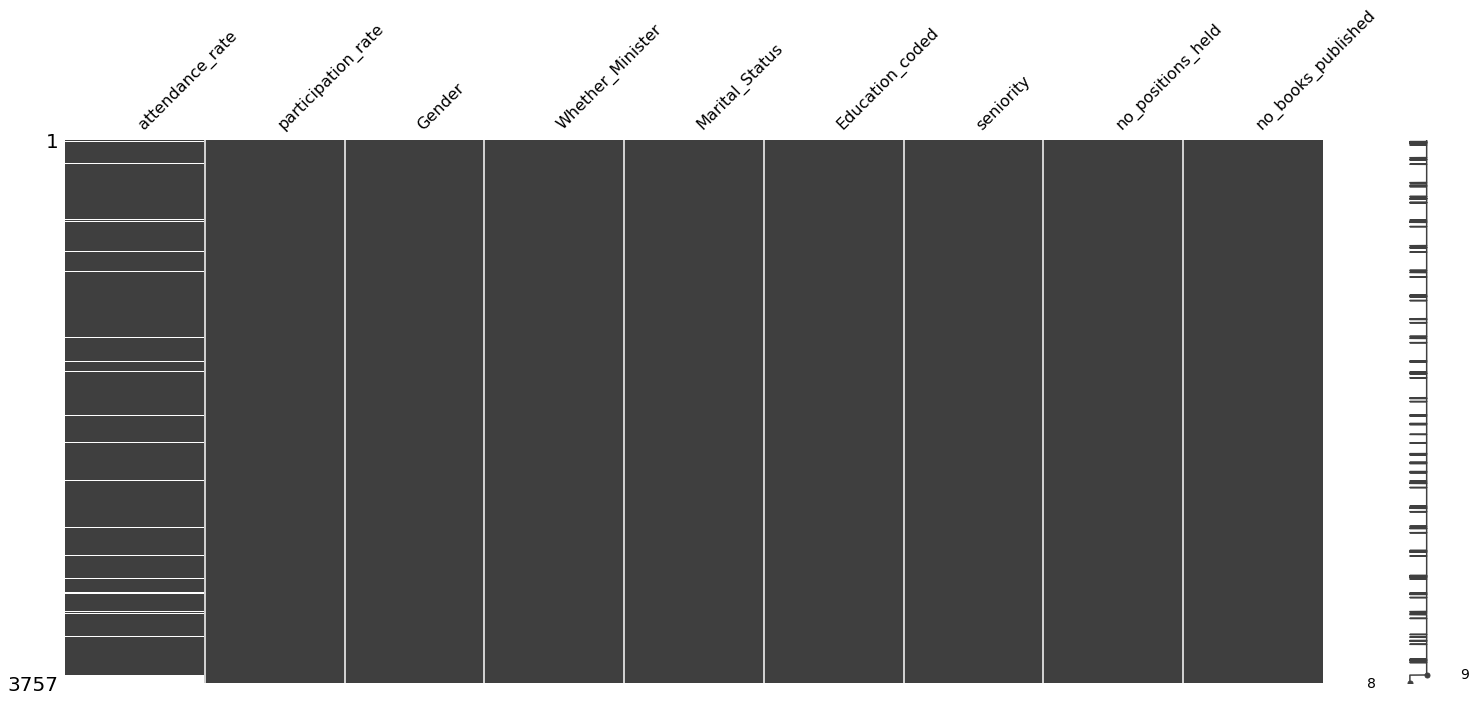

In [32]:
msno.matrix(Dat_215_241_edit1)

In [30]:
Dat_215_241_edit1.attendance_rate.isna().sum()

202

In [33]:
Dat_215_241_edit1.dtypes

attendance_rate       float64
participation_rate    float64
Gender                  int64
Whether_Minister        int64
Marital_Status          int64
Education_coded       float64
seniority             float64
no_positions_held     float64
no_books_published    float64
dtype: object

In [34]:
train_data, test_data = train_test_split(Dat_215_241_edit1,test_size=.25,random_state=1988)
train_data.shape[0]/Dat_215_241_edit1.shape[0]

0.7498003726377429

In [35]:
Dat_215_241_edit1.isna().sum()

attendance_rate       202
participation_rate      0
Gender                  0
Whether_Minister        0
Marital_Status          0
Education_coded         0
seniority               0
no_positions_held       0
no_books_published      0
dtype: int64

In [39]:
knn = KNNImputer(n_neighbors=5)
knn.fit(train_data)
train_data = pd.DataFrame(knn.transform(train_data), columns=['attendance_rate','participation_rate','Gender','Whether_Minister','Marital_Status','Education_coded', 'seniority', 'no_positions_held',
       'no_books_published'])#Missing values imputed
train_data.head()

,attendance_rate,participation_rate,Gender,Whether_Minister,Marital_Status,Education_coded,seniority,no_positions_held,no_books_published
0,0.74,0.35,1.0,0.0,1.0,3.0,24.0,14.0,0.0
1,0.95,1.33,0.0,0.0,1.0,3.0,4.0,5.0,0.0
2,0.60,0.30,0.0,0.0,1.0,3.0,15.0,36.0,1.0
3,1.00,0.00,0.0,0.0,1.0,3.0,4.0,12.0,0.0
4,1.00,1.40,1.0,0.0,1.0,3.0,3.0,18.0,0.0


In [42]:
test_data = pd.DataFrame(knn.transform(test_data),columns=['attendance_rate','participation_rate','Gender','Whether_Minister','Marital_Status','Education_coded', 'seniority', 'no_positions_held',
       'no_books_published'])#Missing values imputed

In [43]:
train_X = train_data.drop(columns=['participation_rate'])
test_X  = test_data.drop(columns=['participation_rate'])
train_y = train_data[['participation_rate']]
test_y  = test_data[['participation_rate']]

In [44]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['attendance_rate','Gender','Whether_Minister','Marital_Status','Education_coded', 'seniority', 'no_positions_held',
       'no_books_published'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['attendance_rate',
                                                                          'Gender',
                                                                          'Whether_Minister',
                                                                          'Marital_Status',
                                                                          'Education_coded',
                                                                          'seniority',
                                                                          'no_positions_held',
                                                                       

In [45]:
search.best_score_

-0.3649307540777086

In [46]:
search.best_params_

{'model': BaggingRegressor()}

In [47]:
mod = search.best_estimator_

In [48]:
mod

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['attendance_rate', 'Gender',
                                                   'Whether_Minister',
                                                   'Marital_Status',
                                                   'Education_coded',
                                                   'seniority',
                                                   'no_positions_held',
                                                   'no_books_published'])])),
                ('model', BaggingRegressor())])

# Performance

In [50]:
pred_y = search.predict(test_X)

In [52]:
metrics.mean_squared_error(test_y,pred_y)

0.3579985302547266

In [54]:
metrics.r2_score(test_y,pred_y)

0.34148653195708656

# Permutation Importance

In [60]:
vi = permutation_importance(mod,train_X,train_y,n_repeats=25)

In [61]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,no_positions_held,0.764236,0.017809,0.728618,0.799854
1,seniority,0.751238,0.015790,0.719658,0.782818
2,attendance_rate,0.494498,0.013971,0.466555,0.522441
3,Education_coded,0.408909,0.014263,0.380384,0.437434
4,no_books_published,0.317157,0.009556,0.298045,0.336268
5,Gender,0.150926,0.007858,0.135211,0.166641
6,Marital_Status,0.006211,0.000591,0.005028,0.007394
7,Whether_Minister,0.000509,0.000043,0.000422,0.000596


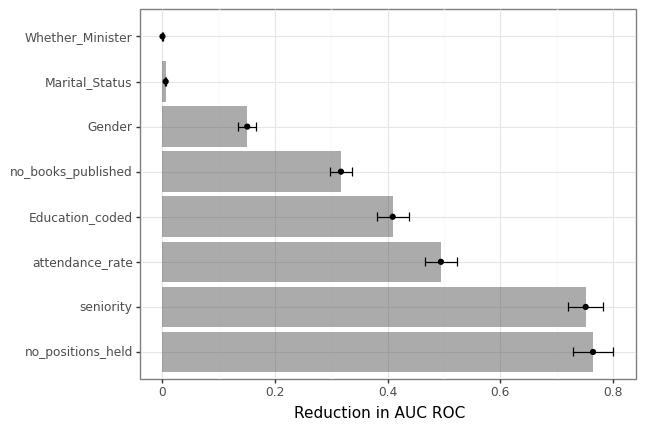

<ggplot: (171014055361)>

In [62]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

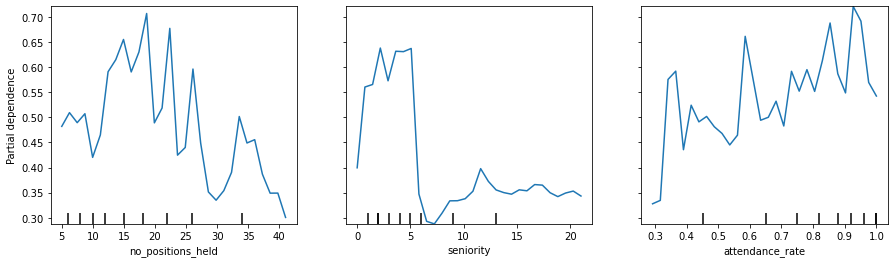

In [63]:
features = ['no_positions_held','seniority','attendance_rate']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)